# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:200%;text-align:center;border-radius:10px 10px;">Sign Classification using Deep Learning</p>

<a id='top'></a>
<p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [IMPORTING LIBRARIES](#1)

* [LOADING DATA](#2)

* [BUILDING MODEL](#3)

* [TRANSFER LEARNING USING INCEPTIONV3](#4)

* [PLOTTING MODEL TRAINING AND VALIDATION RESULT](#5)

* [SAVING MODEL](#6)



<a id="1"></a>
# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

<p style="font-family:newtimeroman;color:#F47340;font-size:150%">The following Libraries will be used in the notebook.</p>

In [3]:
# Importing Libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize
import pandas as pd
import os
import numpy as np
import gc
print("Packages imported...")



Packages imported...


<a id="2"></a>
# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>



In [4]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = 'dataset'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        print('Reading from',folderName)
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else:
                label = 29
            for image_filename in os.listdir(os.path.join(folder,folderName)):
                img_file = cv2.imread(os.path.join(folder,folderName,image_filename))
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))

                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Reading from A
Reading from B
Reading from C
Reading from D
Reading from del
Reading from E
Reading from F
Reading from G
Reading from H
Reading from I
Reading from J
Reading from K
Reading from L
Reading from M
Reading from N
Reading from nothing
Reading from O
Reading from P
Reading from Q
Reading from R
Reading from S
Reading from space
Reading from T
Reading from U
Reading from V
Reading from W
Reading from X
Reading from Y
Reading from Z
Images successfully imported...


 <p style="font-family:newtimeroman;color:#F47340;font-size:150%">
    Now that I have the dataset loaded, let us have a look at a few images.
</p>

FileNotFoundError: [Errno 2] No such file or directory: 'dataset{0}/{0}1.jpg'

<Figure size 640x480 with 0 Axes>

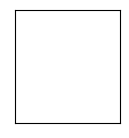

In [5]:
def plot_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "{0}/{0}1.jpg"
        img = plt.imread(path)
        plt.imshow(img)
        #plt.xlabel(label[i])
        
plot_images()

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import gc

X_data = X_train
y_data = y_train
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)
del X_data
del y_data
gc.collect()

1962

<a id="3"></a>
# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">BUILDING MODEL</p>


In [7]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training Model

In [11]:
history=model.fit(X_train, y_cat_train,
          epochs=15,
          batch_size=64,
          verbose=1,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/15
952/952 [==============================] - ETA: 0s - loss: 1.0794 - accuracy: 0.6726WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002AC4EC50048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
952/952 [==============================] - 421s 442ms/step - loss: 1.0794 - accuracy: 0.6726 - val_loss: 0.3189 - val_accuracy: 0.8953
Epoch 2/15
952/952 [==============================] - 386s 406ms/step - loss: 0.1619 - accuracy: 0.9475 - val_loss: 0.0984 - val_accuracy: 0.9669
Epoch 3/15
952/952 [==============================] - 318s 335ms/step - loss: 0.0817 - accuracy: 0.9737 - val_loss: 0.0845 - val_accuracy: 0.9746
Epoch 4/15
952

<a id="5"></a>
# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PLOTTING MODEL TRAINING AND VALIDATION RESULT</p>

In [12]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.079369,0.672644,0.318947,0.895326
1,0.161918,0.947488,0.098396,0.966897
2,0.081656,0.973678,0.084543,0.974559
3,0.053912,0.983054,0.051259,0.984789
4,0.038198,0.987734,0.031250,0.990766
5,0.040420,0.987980,0.028428,0.991571
6,0.035302,0.989655,0.025366,0.993333
7,0.022703,0.993268,0.036090,0.989157
8,0.024917,0.992348,0.022612,0.992759
9,0.022417,0.993399,0.027278,0.992567


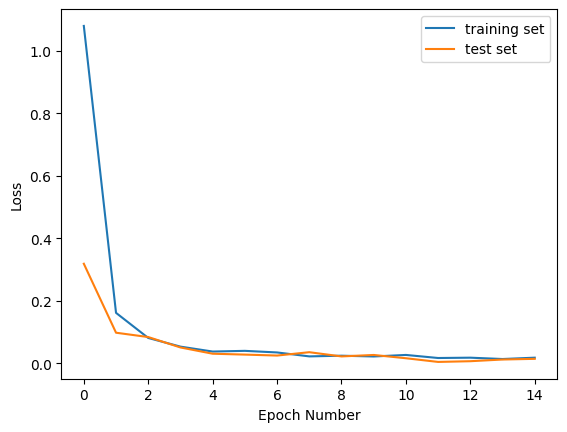

In [13]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(metrics['loss'], label='training set')
plt.plot(metrics['val_loss'], label='test set')
plt.legend()

<a id="6"></a>
# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SAVING MODEL</p>

<p style="font-family:newtimeroman;color:#F47340;font-size:150%">
    Let's save model for future.
</p>

In [14]:
model_name = 'model.h5'
model.save(model_name, save_format='h5')

<a id="7"></a>
# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PREDICTION</p>

<p style="font-family:newtimeroman;color:#F47340;font-size:150%">
    Let's check how accurate is our model.
</p>

In [ ]:
model = tf.keras.models.load_model('model.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(64, 64))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    print(index)
    result=['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z']
    plt.title("Prediction - {}".format(str(result[index]).title()), size=18, color='red')
    plt.imshow(img_array)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1


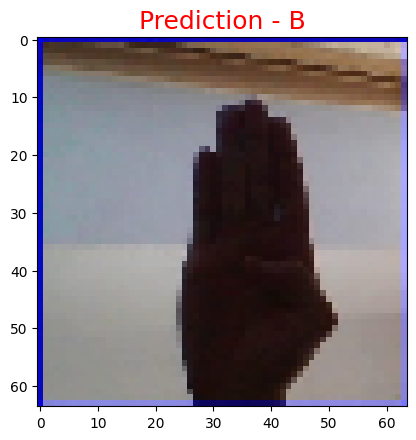

In [ ]:
predict_image('../inception_v3/dataset/B/B11.jpg', model)